<a href="https://www.kaggle.com/code/marioandrs/edabinaryclassificationgato?scriptVersionId=158371334" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification with a Bank Churn Dataset
---
### Playground Series - Season 4, Episode 1

#### Project Notes:

**Data source**: Bank Churn Dataset 

**Creator**: GatoMario

**Stakeholders**: Kagglelers

## Big picture, build models, for a classification problem.

- **EDA, stablishing normality or not**
     - Are there any duplicates?
     - Use Hypothesis to test your assumptions, prove them.
     - Can all the process be done at once? join the data?
     - Understand variables data types.
     - Understand variables distributions.
     - Identify missing or invalid data.
     - Visualize prioritizing appropiate usage, clarity and insight 
     - Make appropiate transformations.
     - Identify outliers, should we take a **parametric or non-pharametric** approach?
         - Subtitute extremes with values of central tendency?
         - Should we remove the values greater that three standard deviation?
     - Check for the four main assumptions of logistic regression.
         - Linearity
         - Independent Observations
         - No multicollinearity
         - No extreme outliers
- Check for Pearson correlation.
- Try to obtain more data from current information. Think BMI...


- **Modeling and evaluating**
  
     -  Pre-process
     -  Split data into independent and dependent variables(s)
     -  Encode categorical vatiables, using One hot technique.
     -  Normalize
     -  Scale
     -  Transform
     -  Split into test and train, and check for appropiate indexing
     -  Fit data to model(s)
     -  Train Model with train data
     -  Analyse metrics like Accuracy, precision, recall, confusion matrix.
     -  Make predictions with test data, Analyze Accuracy, precision, recall, confucion matrix
     -  Test Models, re-calculate metrics with test data.
     -  Compare models and write paragraph about it


**Notes**:
- This is a reiterative exercise and should always be, therefore the order may vary.


This is a Data Science Package that was developed for Data Science, there still room to grow but is well documented and useful, I'm bias as i did it.

In [1]:
pip install --upgrade optuna

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install gatoeda65

  Obtaining dependency information for gatoeda65 from https://files.pythonhosted.org/packages/66/24/960cd6089716d07173566572cb4e3a8616867dbfedda9272bf3e1f1969a7/gatoeda65-0.0.4-py3-none-any.whl.metadata


In [3]:
# Model selection
!pip install pycaret -q
!pip install --upgrade pycaret -q #if you have installed beta version in past, run the below code to upgrade
from pycaret.utils import version

# PyCaret version
version()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.12.1 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.5 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 3.20.3 which is incompatible.
cuml 23.8.0 requires dask==2023.7.1, but you have dask 2023.12.0 which is incompatible.
cuml 23.8.0 requires distributed==2023.7.1, but you have distributed 2023.12.0 which is incompatible.
dask-cuda 23.8.0 requires dask==2023.7.1, but you have dask 2023.12.0 which is incompatible.
dask-c

'3.2.0'

In [4]:
# Graphs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

# Math, algebra, statistics, EDA
from scipy import stats
import scipy
import math
import statsmodels.api as sm
import numpy as np
import pandas as pd
from exploratory_data_analysis import eda_functions as eda

# model selection
# generate a lot of models and run them in train, auto crossvalidation 10 folds.
from pycaret.classification import setup, compare_models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # center data at 0
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
 

import warnings
warnings.filterwarnings("ignore")

# set columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Hyperparameters
import optuna
from optuna.integration import OptunaSearchCV

# Reproducibility
def set_seed(seed=1):
    np.random.seed(seed)
    train_test_split.random_state = seed
    KFold.random_state = seed
    train_test_split.random_state = seed
    CatBoostClassifier.random_seed_ = seed
    GradientBoostingClassifier.random_state = seed
    RandomForestClassifier.random_state = seed
    XGBClassifier.random_state = seed
    LGBMClassifier.random_state = seed
    AdaBoostClassifier.random_state = seed

set_seed()

In [5]:
## Definging and populating the pandas datraframes.
##
train, test = [
    '/kaggle/input/playground-series-s4e1/train.csv',
    '/kaggle/input/playground-series-s4e1/test.csv'
]
train  = pd.read_csv(train)
test = pd.read_csv(test)

In [6]:
## Combine the data frames to clean all at once
## therefore, we need to have some consideratoin for
## later how to re-divide as it was.

## saving test_ids and target
target = train['Exited']
test_ids = test['id']

## and drop them,
train_1 = train.drop(['id', 'Exited'], axis=1)
test_1  = test.drop(['id'], axis=1)
data = pd.concat([train_1, test_1], axis=0).reset_index(drop=True)

## for graphs we keep the dependent variable, so we can observe posible
## relationships.
train_1_g = train.drop(['id'], axis=1)
test_1_g  = test.drop(['id'], axis=1)
df = pd.concat([train_1_g, test_1_g], axis=0).reset_index(drop=True)

#data.head()

## Some basic standarizations:
## Lower case and take all spaces out from columns names.
data.columns =data.columns.str.lower().str.strip('')
df.columns = df.columns.str.lower().str.strip('')
train.columns = train.columns.str.lower().str.strip('')
test.columns = test.columns.str.lower().str.strip('')
pd.set_option('display.max_colwidth', None)

##

In [7]:
df.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [8]:
## Is there any duplicated data?
not_duplicates = data.shape == data.drop_duplicates().shape
if not_duplicates == True:
    print('No Duplicates.')
else: print('Duplicated data.')

No Duplicates.


In [9]:
## Observing null invalids and unique items
eda.get_invalid_values(df)

,nulls,invalids,unique_item
customerid,0,0,"[15674932, 15749177, 15694510, 15741417, 15766172, 15771669, 15692819, 15669611, 15691707, 15591721, 15635097, 15674671, 15717962, 15793029, 15643294, 15690958, 15566543, 15679804, 15671358, 15650670, 15781496, 15691808, 15759913, 15576044, 15626012, 15671137, 15665180, 15765461, 15794849, 15573769, 15583026, 15704795, 15678626, 15624993, 15593973, 15661591, 15635330, 15761718, 15756475, 15653849, 15799785, 15723827, 15673599, 15662494, 15643671, 15759537, 15580912, 15800806, 15777591, 15645353, 15776824, 15797900, 15791342, 15593694, 15673772, 15775116, 15780088, 15791774, 15637366, 15579787, 15640034, 15807335, 15720509, 15797733, 15719579, 15725882, 15763612, 15706232, 15726354, 15747541, 15660301, 15796849, 15674343, 15593772, 15646563, 15791326, 15654296, 15660688, 15780038, 15792818, 15762882, 15692931, 15603840, 15651581, 15777797, 15616700, 15659234, 15673877, 15784700, 15768233, 15690175, 15579526, 15623082, 15641822, 15756875, 15791534, 15671139, 15576935, 15669946, 15624391, ...]"
surname,0,0,"[Okwudilichukwu, Okwudiliolisa, Hsueh, Kao, Chiemenam, Genovese, Ch'ang, Chukwuebuka, Manna, Cattaneo, Fokine, Chiu, Rossi, Ts'ai, Chukwuemeka, Tung, Macdonald, Esquivel, Hargreaves, Ts'ui, Udegbulam, Nnachetam, Trentini, Akabueze, Obidimkpa, Sazonova, Vasilieva, Shih, Chidubem, Yermolayev, L?, Kumm, Okonkwo, Ch'ien, Panicucci, Walker, Lucchesi, Kenniff, Ting, Hs?, Hsia, Mamelu, Ibezimako, Chiekwugo, Ch'iu, McNeill, Johnston, Chubb, Aksenov, T'ien, Onyekachi, Omeokachie, Nkemakolam, Porter, Goliwe, Su, Nkemakonam, Mazzi, Shao, Macfarlan, Calabrese, Nwachukwu, T'an, Maclean, Hsiung, Lettiere, Y?, Macleod, Mazzanti, King, Blair, Palermo, Lo Duca, Bales, Nnaemeka, H?, Chiang, Ibeabuchi, Chikelu, Fanucci, Niu, Ndukaku, Mironova, Scott, Ampt, Williamson, T'ang, Eremenko, Ndubuagha, Alleyne, Pagnotto, Pinto, Li Fonti, Chiagoziem, Ritchie, Onyekaozulu, Palerma, Ofodile, Dyer, Hill, ...]"
creditscore,0,0,"[668, 627, 678, 581, 716, 588, 593, 676, 583, 599, 687, 759, 681, 703, 549, 602, 636, 645, 559, 773, 554, 553, 714, 616, 586, 785, 834, 632, 746, 797, 753, 749, 413, 611, 752, 551, 747, 683, 684, 696, 591, 488, 685, 579, 607, 742, 677, 461, 634, 647, 577, 809, 686, 633, 494, 699, 663, 756, 648, 563, 682, 620, 721, 652, 535, 584, 701, 640, 711, 707, 631, 637, 622, 775, 817, 592, 743, 726, 431, 571, 659, 639, 618, 722, 712, 672, 804, 730, 506, 569, 558, 507, 594, 796, 615, 619, 471, 434, 706, 758, ...]"
geography,0,0,"[France, Spain, Germany]"
gender,0,0,"[Male, Female]"
age,0,0,"[33.0, 40.0, 34.0, 36.0, 30.0, 37.0, 43.0, 27.0, 71.0, 47.0, 25.0, 55.0, 61.0, 35.0, 41.0, 44.0, 26.0, 39.0, 31.0, 58.0, 49.0, 32.0, 50.0, 28.0, 45.0, 52.0, 29.0, 38.0, 54.0, 56.0, 46.0, 42.0, 64.0, 20.0, 21.0, 23.0, 48.0, 59.0, 51.0, 24.0, 53.0, 62.0, 57.0, 22.0, 66.0, 67.0, 19.0, 73.0, 60.0, 63.0, 65.0, 75.0, 68.0, 69.0, 76.0, 18.0, 70.0, 81.0, 74.0, 72.0, 77.0, 82.0, 79.0, 92.0, 80.0, 78.0, 83.0, 36.44, 85.0, 32.34, 84.0, 45.25, 48.64, 88.0]"
tenure,0,0,"[3, 1, 10, 2, 5, 4, 8, 6, 9, 7, 0]"
balance,0,0,"[0.0, 148882.54, 131778.58, 144772.69, 138476.41, 81274.33, 161801.47, 90432.92, 190566.65, 117559.05, 120105.43, 153711.26, 85200.82, 121823.26, 149879.66, 136789.14, 147262.11, 99208.46, 128518.98, 132576.25, 130969.77, 82293.82, 114514.71, 114779.35, 142293.54, 77253.22, 101099.9, 154737.88, 122449.31, 160541.0, 92219.41, 131344.52, 122314.64, 132439.99, 112668.48, 131136.97, 124439.49, 110939.3, 129845.53, 146425.31, 126731.71, 177799.83, 123575.51, 127539.9, 127539.97, 131569.63, 139422.39, 106920.91, 141859.12, 85704.95, 109026.6, 117799.28, 132627.51, 126683.4, 107042.74, 161807.18, 123873.52, 133476.09, 121789.63, 90612.34, 117468.64, 137553.29, 130147.98, 139979.07, 185732.59, 146584.19, 137555.44, 103421.8, 102025.32, 89800.14, 140700.61, 131354.25, 133658.24, 80673.96, 91711.66, 127864.4, 125445.04, 92310.54, 131345.26, 170228.59, 131644.0, 121240.54, 110581.29, 125847.75, 141581.08, 128747.69, 120108.76,

In [10]:
eda.miss_df(df)

,Total,Percent
exited,110023,40.000073
customerid,0,0.000000
surname,0,0.000000
creditscore,0,0.000000
geography,0,0.000000
gender,0,0.000000
age,0,0.000000
tenure,0,0.000000
balance,0,0.000000
numofproducts,0,0.000000


In [11]:
## metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275057 entries, 0 to 275056
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customerid       275057 non-null  int64  
 1   surname          275057 non-null  object 
 2   creditscore      275057 non-null  int64  
 3   geography        275057 non-null  object 
 4   gender           275057 non-null  object 
 5   age              275057 non-null  float64
 6   tenure           275057 non-null  int64  
 7   balance          275057 non-null  float64
 8   numofproducts    275057 non-null  int64  
 9   hascrcard        275057 non-null  float64
 10  isactivemember   275057 non-null  float64
 11  estimatedsalary  275057 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 25.2+ MB


## Quick re-grouping:

- We joined the test and train
- We are not missing data
- Although all the data numerical some is categorical
- There is some names that are like H?, or Y?, I think they are valid.

**Description of the data:**

Customer ID: A unique identifier for each customer.

Surname: The customer's surname or last name.

Credit Score: A numerical value representing the customer's credit score, continious.

Geography: The country where the customer resides (France, Spain or Germany), categorical.

Gender: The customer's gender (Male or Female), categorical.

Age: The customer's age, continious.

Tenure: The number of years the customer has been with the bank, continious.

Balance: The customer's account balance, continious.

NumOfProducts: The number of bank products the customer uses, ordinal.

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no), categorical.

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no), categorical.

EstimatedSalary: The estimated salary of the customer, continious.

Exited: Whether the customer has churned (1 = yes, 0 = no), categorical.


In [12]:
## dividing data bases ond its qualities.

cats = ['geography', 'gender', 'numofproducts', 'hascrcard', 'isactivemember', 'exited']
cont = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

## also by exited or not
exited_df     = df[df['exited'] == 1]
non_exited_df = df[df['exited'] == 0]

## Observing distributions & Descriptive Statistics

Lets observe Measures of central tendency, dispersion, percentiles, quartiles and position.


GEOGRAPHY:
---
France     157386
Spain       60126
Germany     57545
Name: geography, dtype: int64


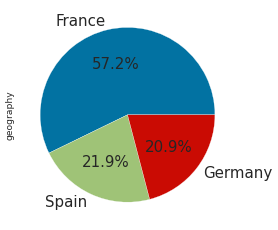


---

GENDER:
---
Male      155092
Female    119965
Name: gender, dtype: int64


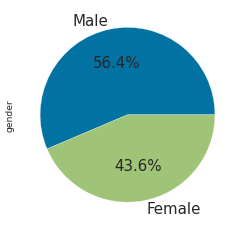


---

NUMOFPRODUCTS:
---
2    140629
1    128941
3      4708
4       779
Name: numofproducts, dtype: int64


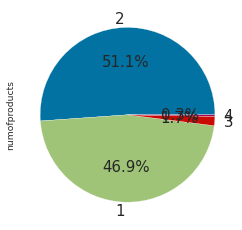


---

HASCRCARD:
---
1.0    207280
0.0     67777
Name: hascrcard, dtype: int64


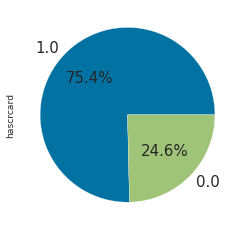


---

ISACTIVEMEMBER:
---
0.0    138421
1.0    136636
Name: isactivemember, dtype: int64


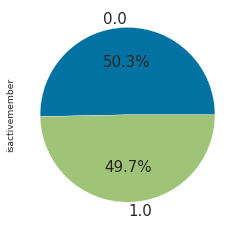


---

EXITED:
---
0.0    130113
1.0     34921
Name: exited, dtype: int64


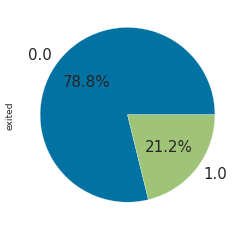


---


In [13]:
## Counts and percentage per categorical features in the whole data:
for i in cats:
    print()
    print(str.upper(i)+':')
    print('---')
    print(df[i].value_counts()[:])
    labels = df[i].unique()
    figure(figsize=(6, 4), dpi=60)
    df[i].value_counts().plot.pie(
        labels=labels,
        autopct='%1.1f%%',
        textprops={'fontsize': 18})   
    plt.tight_layout()
    plt.show();
    print()
    print('---')
    

<Figure size 360x240 with 0 Axes>

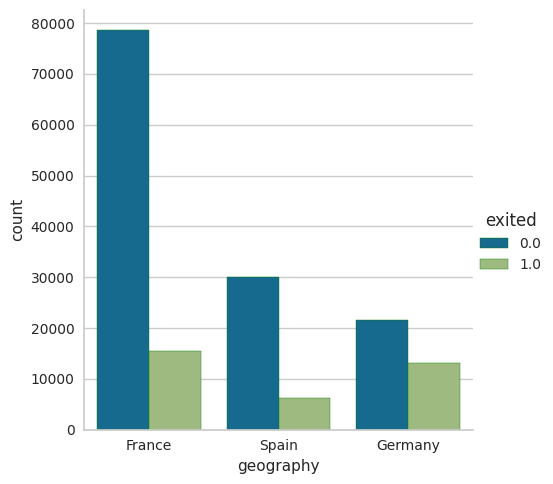

<Figure size 360x240 with 0 Axes>

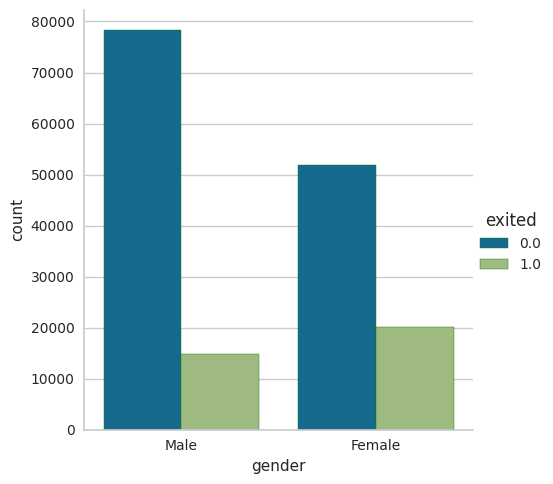

<Figure size 360x240 with 0 Axes>

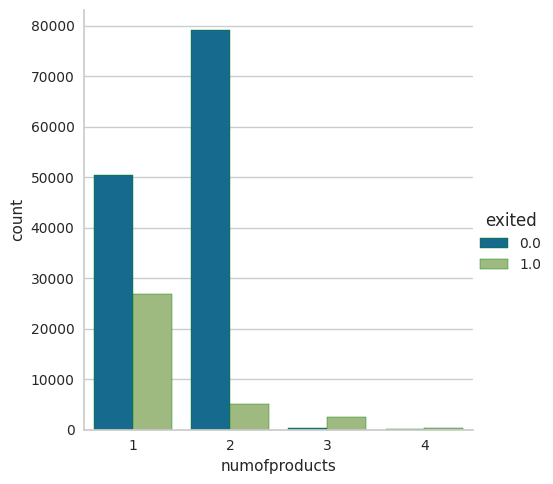

<Figure size 360x240 with 0 Axes>

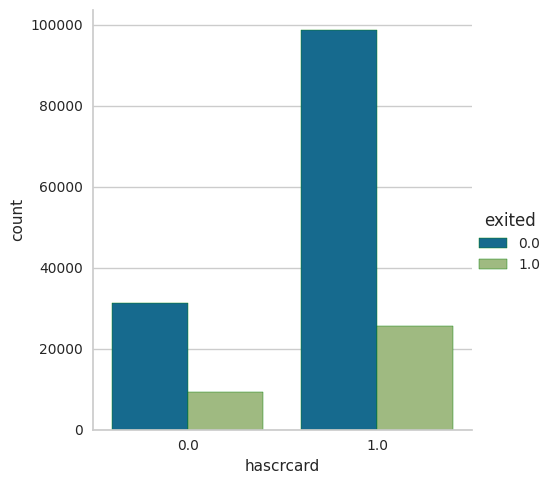

<Figure size 360x240 with 0 Axes>

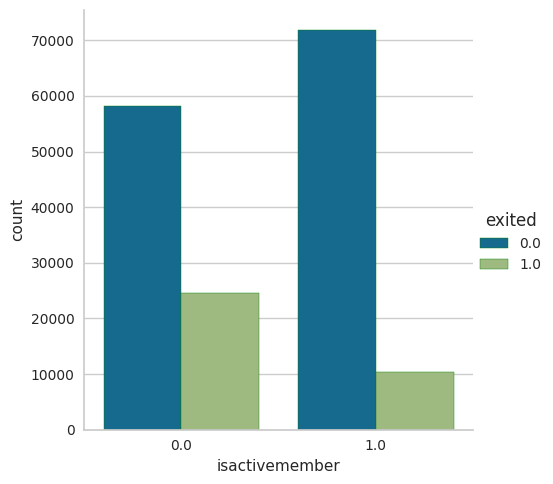

<Figure size 360x240 with 0 Axes>

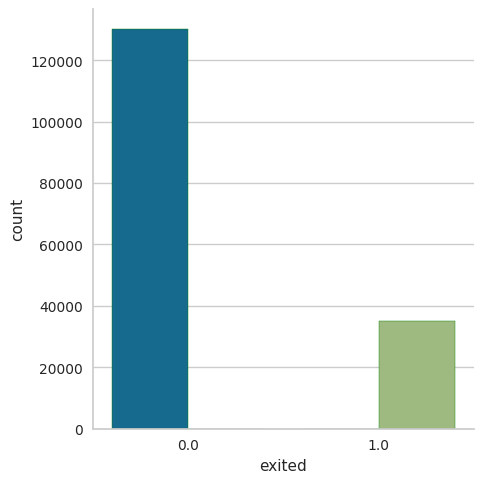

In [14]:
## categorical features in realtionship with target:

for i in cats[:]:
    figure(figsize=(6, 4), dpi=60);
    sns.catplot(
    data=df,
    x=i,
    hue='exited', 
    edgecolor='green',    
    kind='count');


## The same but with continious data

creditscore
age
tenure
balance
estimatedsalary


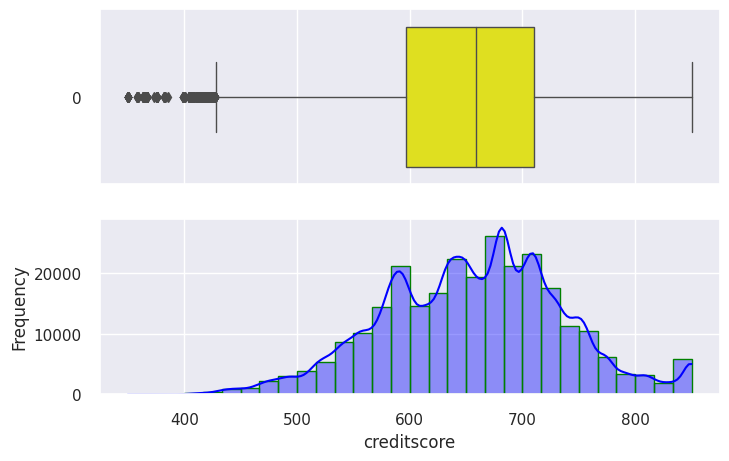

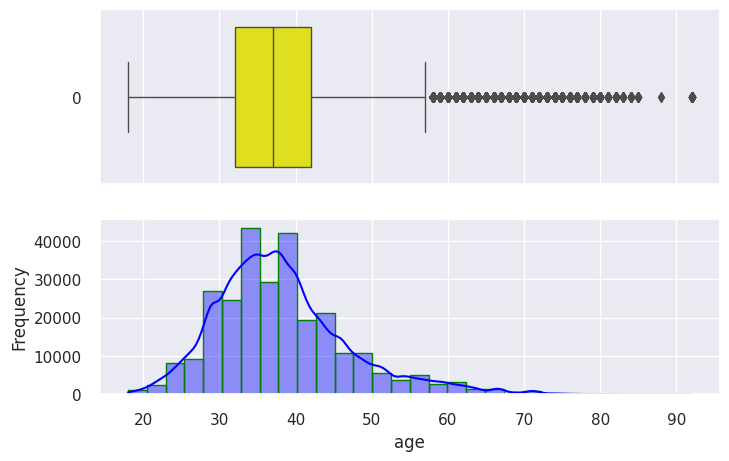

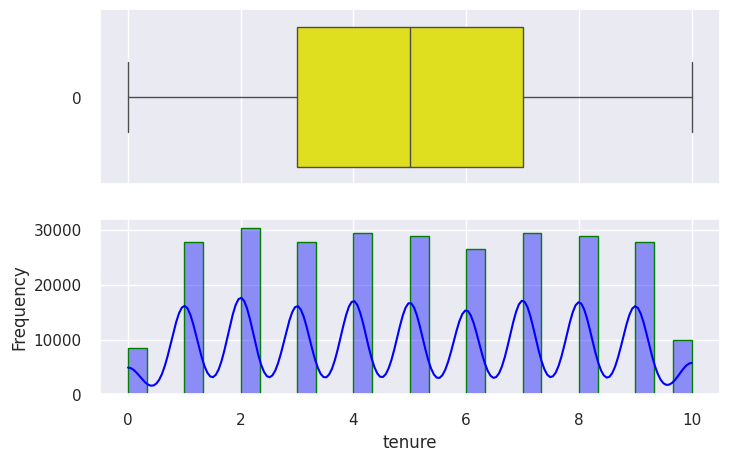

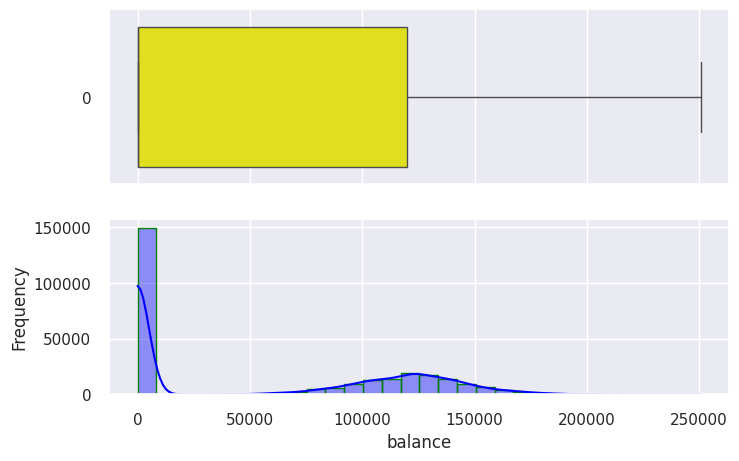

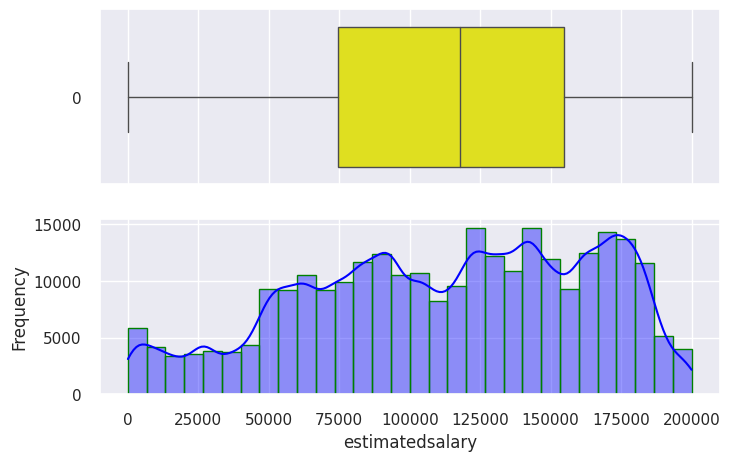

In [15]:
## Observing Distribution of the continious variables cont :)
for i in cont:
    sns.set(rc={"figure.figsize":(8, 5)});
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    print(i)
    plt.gca().set(xlabel=i, ylabel='Frequency');

    sns.boxplot(df[i], orient='h', ax=ax_box , linewidth= 1.0, color='yellow');
    sns.histplot(df[i], ax=ax_hist , bins=30, kde=True, color='blue', edgecolor='green', alpha=0.4);

## Quick re-grouping, number two:

- We joined the test and train
- We are not missing data
- Although all the data numerical some is categorical
- There is some names that are like H?, or Y?, I think they are valid.
### - **NEW:**
- We have check the counts per categorical features, as well as counts respective to the target:

    - France has the largerst group of participants, followed by spain and Germany
    - 43.6% are Female and 56.4% males.
    - The majority use 2 products
    - 75% of the participants has card.
    - 50% is an active member
    - and 79% vs 21% is the balance in the target.
    

- From the continious variables:
    - Credit score seems normally distribuites, we can also observe the outlierrs close to 0.
    - Age seems normally distribuited with some outliers.
    - Tenure, although continious, maybe more interesting to see it as categorical.
    - Balance, normally distribuited, if we take the zero values
    - Estimated salary, I'm not sure how was estimated. Based on credit score?
    
#### Some question that one can ask from the observed:

- Does people in Germany as an average churn more than people of Spain?
- Does people in Germany as an average churn more than people of France?
- Does people in France as an average churn more than people of Spain?

- Is Credit score, Balance, and Age normal distribuited?

Therefore:

## **HIPOTHEIS:**

1) 

$H_o:$ Credit score, Balance, and Age ARE Normal

$H_a:$ Credit score, Balance, and Age ARE NOT Normal

2)

- Does people in Germany as an average churn more than people of Spain?
- Does people in Germany as an average churn more than people of France?
- Does people in France as an average churn more than people of Spain?


To **answer this questions**:
we need:
- Run Chi-square test of independence, and check significance.
- Run a pair wise proportion test is significance is significant.
- Interpretation.







In [16]:
## Credit score, Balance, and Age ARE Normal or
## Credit score, Balance, and Age ARE NOT Normal

for col in ['creditscore', 'balance', 'age']:
    t, p = stats.shapiro(df[col])
    print(f'For the feature: {col} the p-value is: {p} and the t-test: {t}')

For the feature: creditscore the p-value is: 0.0 and the t-test: 0.9965718984603882
For the feature: balance the p-value is: 0.0 and the t-test: 0.7532817125320435
For the feature: age the p-value is: 0.0 and the t-test: 0.9510330557823181


(None,
 array(['age', 'tenure', 'balance', 'estimatedsalary'], dtype=object),
             column  kurtosis  skewness  need_transformation
 0      creditscore  0.067869  0.060537                False
 1              age  1.554768  0.969787                 True
 2           tenure  1.156029  0.012432                 True
 3          balance  1.601423  0.383295                 True
 4  estimatedsalary  0.840127  0.307522                 True)

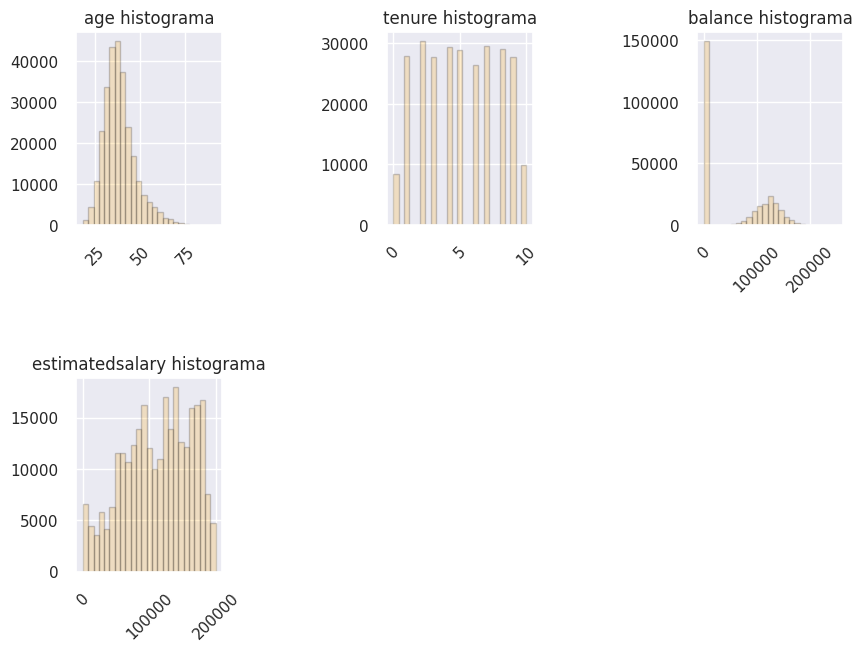

In [17]:
## Checking for Kurtosis and Skewness:
eda.kurt_skew(df, cont)

In [18]:
## Checking for Statistics:
df[cont].describe().T

,count,mean,std,min,25%,50%,75%,max
creditscore,275057.0,656.484939,80.188100,350.00,597.0,659.00,710.00,850.00
age,275057.0,38.124415,8.864927,18.00,32.0,37.00,42.00,92.00
tenure,275057.0,5.010867,2.806173,0.00,3.0,5.00,7.00,10.00
balance,275057.0,55420.296450,62805.933171,0.00,0.0,0.00,120037.96,250898.09
estimatedsalary,275057.0,112470.952558,50286.608747,11.58,74580.8,117848.09,154871.13,199992.48


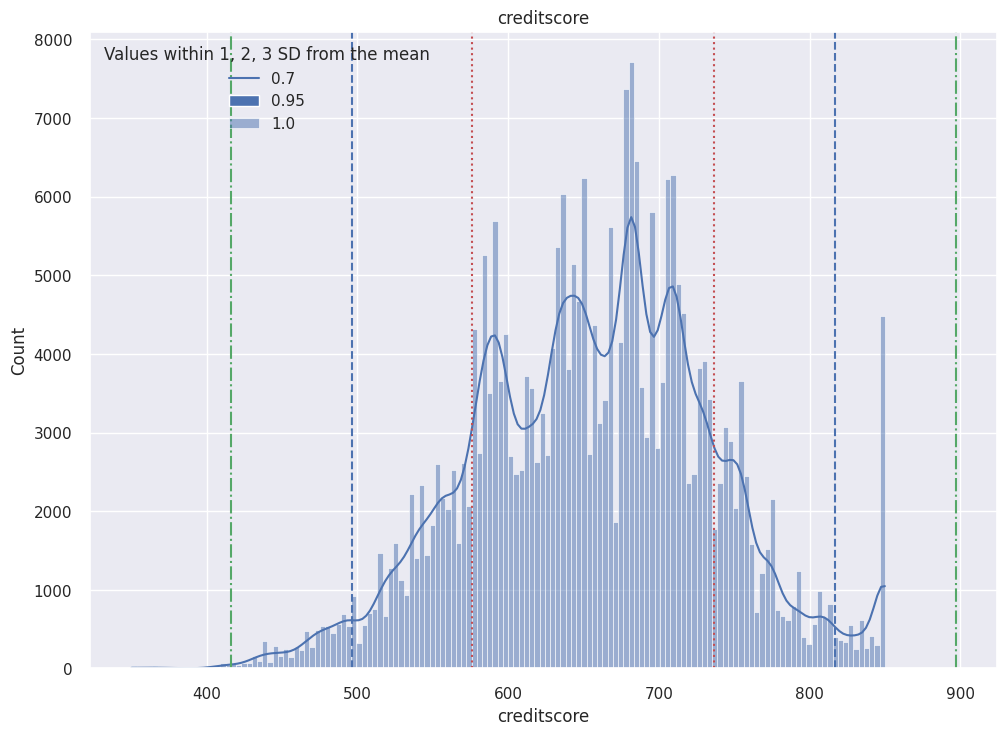

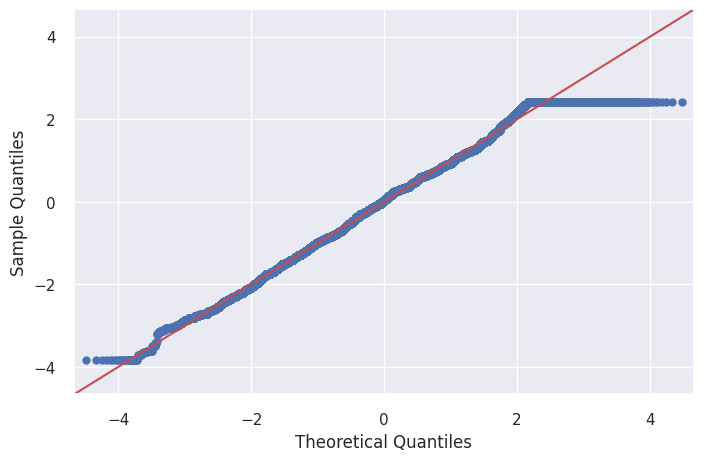

,creditscore,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.70,0.680,0.020
Frac of the values within +/- 2 SD from the mean,0.95,0.950,0.000
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [19]:
## Lets check for the empirical rule, distribution and QQplots
## :
eda.distribution(df,'creditscore')
eda.empirical(df, 'creditscore')

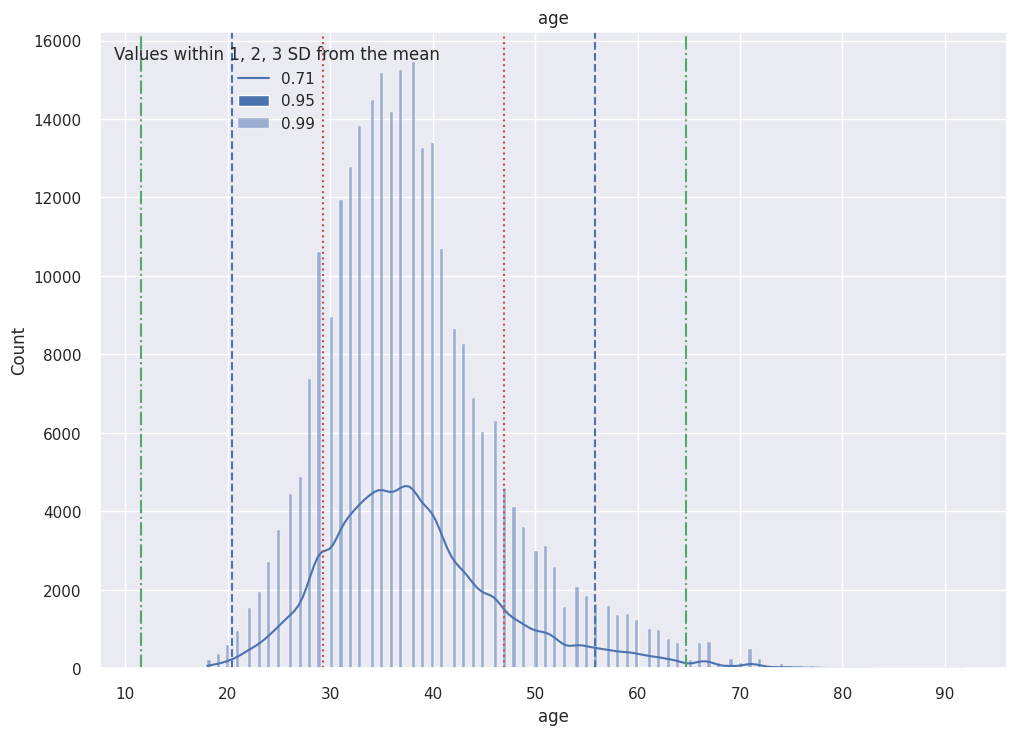

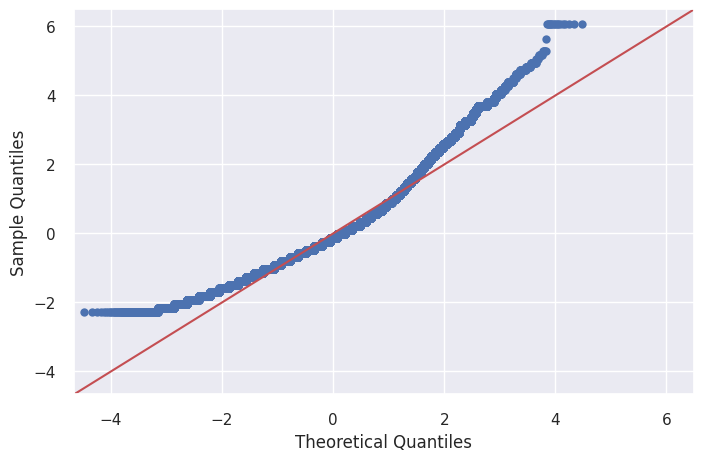

,age,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.71,0.680,0.030
Frac of the values within +/- 2 SD from the mean,0.95,0.950,0.000
Frac of the values within +/- 3 SD from the mean,0.99,0.997,0.007


In [20]:
## lets check for the empirical rule:
eda.distribution(df,'age')
eda.empirical(df, 'age')

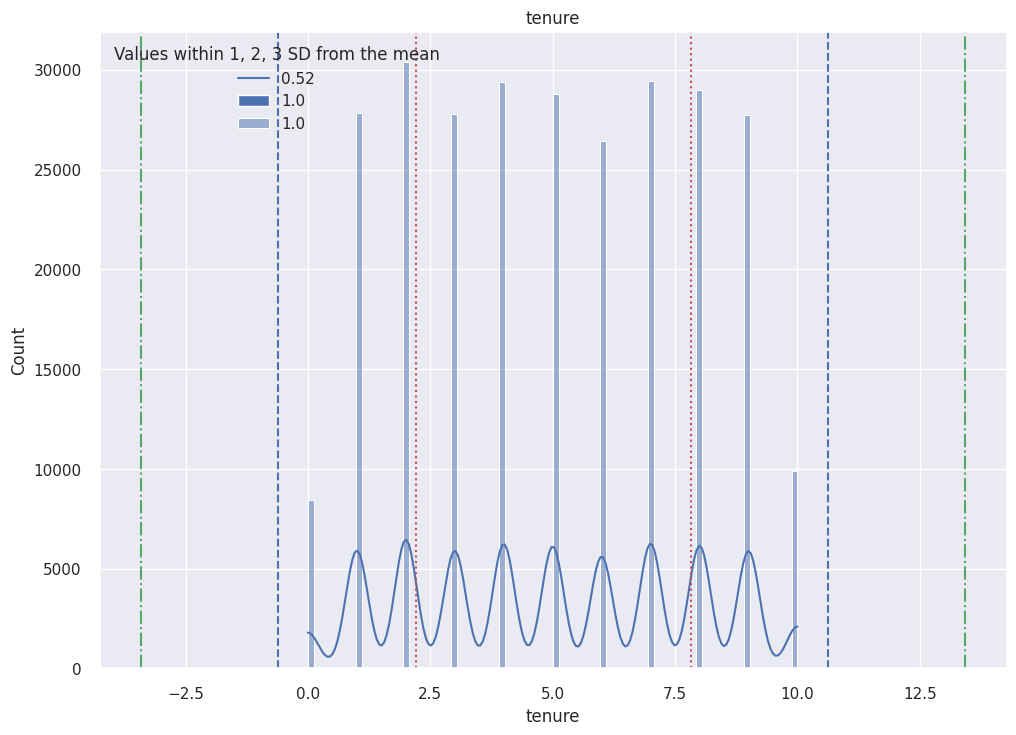

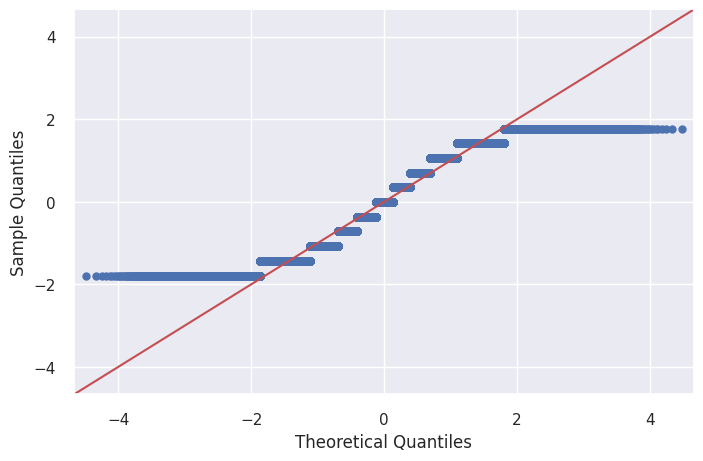

,tenure,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.52,0.680,0.160
Frac of the values within +/- 2 SD from the mean,1.00,0.950,0.050
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [21]:
## lets check for the empirical rule:
eda.distribution(df, 'tenure')
eda.empirical(df, 'tenure')

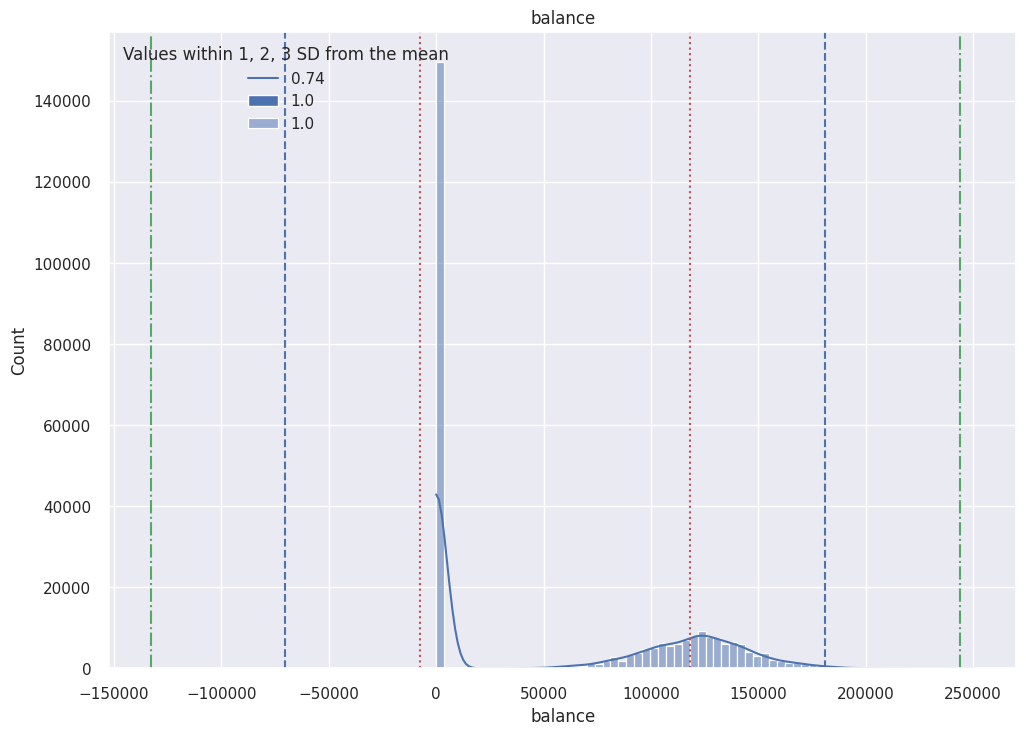

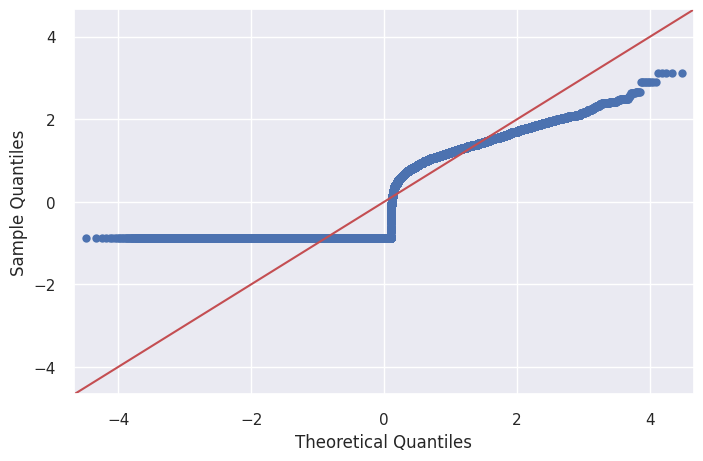

,balance,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.74,0.680,0.060
Frac of the values within +/- 2 SD from the mean,1.00,0.950,0.050
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [22]:
## lets check for the empirical rule:
eda.distribution(df, 'balance')
eda.empirical(df, 'balance')

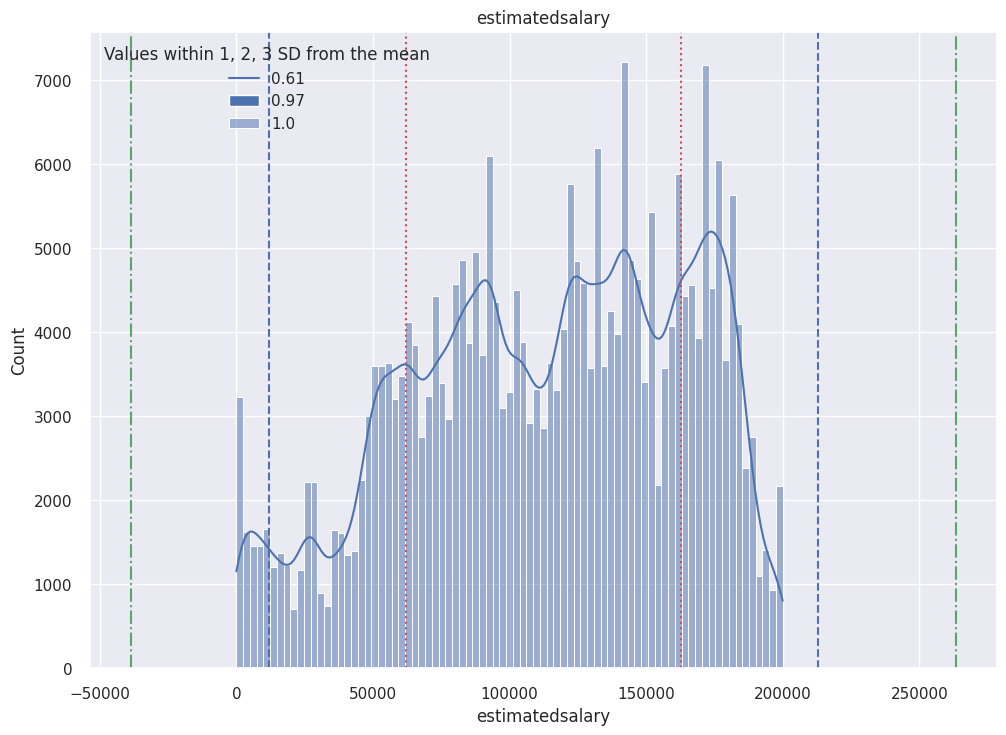

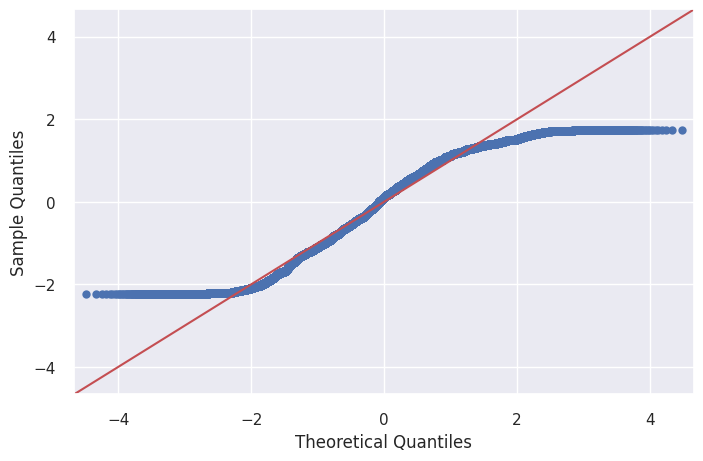

,estimatedsalary,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.61,0.680,0.070
Frac of the values within +/- 2 SD from the mean,0.97,0.950,0.020
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [23]:
## lets check for the empirical rule:
eda.distribution(df, 'estimatedsalary')
eda.empirical(df, 'estimatedsalary')

## From the Continious ditributions:

From a parametric point of view`creditscore` and `age` can be good candidates for a logistic regression.

From a non-paramethric point of view all the features could be included.

Therefore, it makes more sense to use tree models.

I will still do a logistic regression.



---
From the categorical Features we still could answer if as an average is a difference bewteen countries having in mind the target.

To do that we need to do a Chi-square test and here some notes that I have from a course:

# Chi-squared tests: Goodness of fit versus independence

Hypothesis tests are used to see significant differences among groups. 

Chi-squared tests are used to determine whether one or more observed categorical variables follow expected distribution(s). 

This will cover the two main chi-squared tests—Goodness of Fit and Test for Independence—which can be used to test your expected hypothesis against what actually occurred. 

### The Chi-squared Goodness of Fit Test 

Chi-squared (χ²) Goodness of Fit Test is a hypothesis test that determines whether an observed categorical variable follows an expected distribution. 

- The null hypothesis **($H_o$)** of the test is that the categorical variable follows the expected distribution. 
- The alternative hypothesis **($H_a$)** is that the categorical variable does not follow the expected distribution. 

We will define the null and alternative hypotheses based on the scenario, 
**set up a Goodness of Fit test, evaluate the test results, and draw a conclusion** 

In [24]:
## Create a crosstab using pandas for a concise and clear table
contingency_table = pd.crosstab(train['geography'], train['exited'])
contingency_table

exited,0,1
geography,,
France,78643,15572
Germany,21492,13114
Spain,29978,6235


• chi2: Chi-square test statistic.

• p: p-value (probability of observing the data if the variables are independent).

• dof: Degrees of freedom.

• expected: Array of expected frequencies under independence.

In [25]:
## test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [26]:
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-square statistic: 7358.673765244894
p-value: 0.0
Degrees of freedom: 2
Expected frequencies:
 [[74279.21697953 19935.78302047]
 [27283.41116376  7322.58883624]
 [28550.37185671  7662.62814329]]


- The p-value is extremely small (0.0), significantly less than the common significance level of 0.05.

- This strongly suggests you can reject the null hypothesis of independence between country and churn rate.

- There's a significant association between the two variables.

*Churn Rates*

**France: 15572 / (78643 + 15572) ≈ 16.5%**

**Germany: 13114 / (21492 + 13114) ≈ 37.4%**

**Spain: 6235 / (29978 + 6235) ≈ 17.1%**

<Figure size 360x240 with 0 Axes>

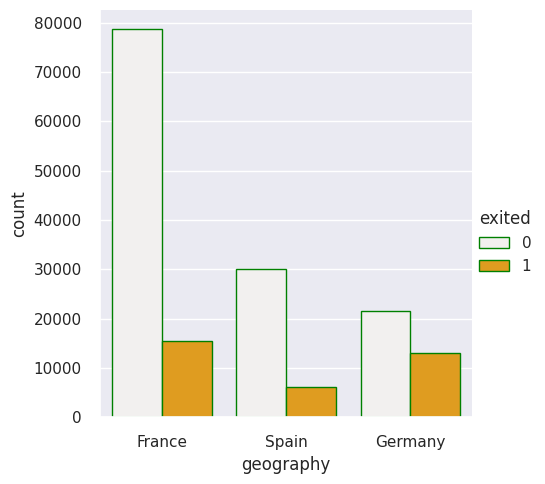

In [27]:
figure(figsize=(6, 4), dpi=60);
sns.catplot(
data=train,
x='geography',
hue='exited', 
color='orange',
edgecolor='green',    
kind='count');

In [28]:
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import itertools
from statsmodels.formula.api import logit

## Pairwise comparisons with chi-square
for c1, c2 in itertools.combinations(train["geography"].unique(), 2):
    df1 = train[train["geography"] == c1].reset_index(drop=True)  # Reset indices for alignment
    df2 = train[train["geography"] == c2].reset_index(drop=True)
    crosstab = pd.crosstab(df1["exited"], df2["exited"])

    try:
        chi2, p, dof, expected = chi2_contingency(crosstab)
        print(f"Comparison (chi-square): {c1} vs. {c2} - p-value: {p}")
    except ValueError as e:
        print(f"Error for {c1} vs. {c2} (chi-square): {e}")

## Pairwise comparisons with Z-test (using proportions_ztest)
for c1, c2 in itertools.combinations(train["geography"].unique(), 2):
    count1 = train[train["geography"] == c1]["exited"].sum()
    nobs1 = len(train[train["geography"] == c1])
    
    count2 = train[train["geography"] == c2]["exited"].sum()
    nobs2 = len(train[train["geography"] == c2])
    
    count = np.array([count1, count2])
    nobs  = np.array([nobs1, nobs2])
    
    ##
    num_comparisons = len(list(itertools.combinations(train["geography"].unique(), 2)))
    adjusted_alpha = 0.05 / num_comparisons

    z_stat, p = proportions_ztest(count, nobs)  # Correctly specified
    p_adjusted = p * len(list(itertools.combinations(train["geography"].unique(), 2)))
    print(f"Comparison (Z-test, adjusted): {c1} vs. {c2} - p-value: {p_adjusted}")
    if p <= adjusted_alpha:
        print("--> Significant difference at adjusted alpha level")

Comparison (chi-square): France vs. Spain - p-value: 0.38482692129158025
Comparison (chi-square): France vs. Germany - p-value: 0.7821213414430305
Comparison (chi-square): Spain vs. Germany - p-value: 0.668067803858351
Comparison (Z-test, adjusted): France vs. Spain - p-value: 0.008419321260096042
--> Significant difference at adjusted alpha level
Comparison (Z-test, adjusted): France vs. Germany - p-value: 0.0
--> Significant difference at adjusted alpha level
Comparison (Z-test, adjusted): Spain vs. Germany - p-value: 0.0
--> Significant difference at adjusted alpha level


1. Chi-Square Test:

• The chi-square test results suggest that there are no statistically significant differences in the proportions of "exited" customers across the three geographies at a conventional significance level (usually 0.05).

• However, it's essential to consider the sample size and power of the test when interpreting these results. Smaller sample sizes or low power can lead to non-significant results even when true differences exist.

2. Z-Test (Adjusted):

**CORRECTION:**
The feedback Suranands gave me is accurate. When we adjust for multiple pairwise comparisons using the Bonferroni method, 
we should indeed divide the significance level (α) by the number of comparisons, rather than multiplying the p-values.

Original α = 0.05
Number of comparisons = 3
Adjusted α = 0.05 / 3 = 0.0167 (approximately)
and then compare against p-values.

France vs. Spain: The original p-value (0.0084) is still significant at the adjusted α level of 0.0167.
France vs. Germany and Spain vs. Germany: The original p-values were 0.0, indicating even stronger significance and remaining significant after the adjustment.

In contrast to the chi-square test, the Z-test (adjusted for multiple comparisons) **indicates significant differences** in the proportions of "exited" customers between the following pairs:

- France and Spain (p-value = 0.0084)

- France and Germany (p-value = 0.0)

- Spain and Germany (p-value = 0.0)


**These results suggest that the proportions of `exited` customers are not the same across these `geographies`.**

**Future work to do:**

...We can conclude that the difference between Churn in Germany and the other two regions (France and Spain) is **statistically significant**, while it is for France and Spain. Thus, in your feature engineering, you could reduce the levels of your Geographic factor from 3 to 2 (Germany vs Other countries) and see how the model performs in comparison.


## Quick re-grouping, number three:

- We joined the test and train
- We are not missing data
- Although all the data numerical some is categorical
- There is some names that are like H?, or Y?, I think they are valid.

- We have check the counts per categorical features, as well as counts respective to the target:

    - France has the largerst group of participants, followed by spain and Germany
    - 43.6% are Female and 56.4% males.
    - The majority use 2 products
    - 75% of the participants has card.
    - 50% is an active member
    - and 79% vs 21% is the balance in the target.
    
- From the continious variables:
    - Credit score seems normally distribuites, we can also observe the outlierrs close to 0.
    - Age seems normally distribuited with some outliers.
    - Tenure, although continious, maybe more interesting to see it as categorical.
    - Balance, normally distribuited, if we take the zero values
    - Estimated salary, I'm not sure how was estimated. Based on credit score?
    
### - **NEW:**:

- Does people in Germany as an average churn more than people of Spain?
- Does people in Germany as an average churn more than people of France?
- Does people in France as an average churn more than people of Spain?

What we concluded is:

**The results suggest that the proportions of exited customers are not the same across Spain, France and Germany.**

- Is Credit score, Balance, and Age normal distribuited?

**Age and Credit score are close to be normal**

- **Modeling and evaluating**
  
     -  Pre-process
     -  Split data into independent and dependent variables(s)
     -  Encode categorical vatiables, using One hot technique.
     -  Normalize
     -  Scale
     -  Transform
     -  Split into test and train, and check for appropiate indexing
     -  Fit data to model(s)
     -  Train Model with train data
     -  Analyse metrics like Accuracy, precision, recall, confusion matrix.
     -  Make predictions with test data, Analyze Accuracy, precision, recall, confucion matrix
     -  Test Models, re-calculate metrics with test data.
     -  Compare models and write paragraph about it



In [29]:
## missing values.
eda.miss_df(data)

,Total,Percent
customerid,0,0.0
surname,0,0.0
creditscore,0,0.0
geography,0,0.0
gender,0,0.0
age,0,0.0
tenure,0,0.0
balance,0,0.0
numofproducts,0,0.0
hascrcard,0,0.0


In [30]:
## Normalization

kurt = (stats.describe(data[cont])).kurtosis
skew = (stats.describe(data[cont])).skewness

In [31]:
# if the column is gretter than 0.5 is skew
info = pd.DataFrame({'column': data[cont].columns, 'kurtosis': abs(kurt), 'skewness': abs(skew)})
info['need_transformation'] = info['kurtosis'].apply(lambda x: True if x >= 0.5 else False)

In [32]:
info

,column,kurtosis,skewness,need_transformation
0,creditscore,0.067869,0.060537,False
1,age,1.554768,0.969787,True
2,tenure,1.156029,0.012432,True
3,balance,1.601423,0.383295,True
4,estimatedsalary,0.840127,0.307522,True


In [33]:
## numerical columns that are skew and need attention.
skew = info.query('need_transformation == True')['column'].values
skew

array(['age', 'tenure', 'balance', 'estimatedsalary'], dtype=object)

In [34]:
## transforming 
for col in skew:
    data[col] = np.log1p(data[col])

In [35]:
## Note the transformations.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,275057.0,1.569204e+07,71512.708935,1.556570e+07,1.563300e+07,1.569017e+07,1.575688e+07,1.581569e+07
creditscore,275057.0,6.564849e+02,80.188100,3.500000e+02,5.970000e+02,6.590000e+02,7.100000e+02,8.500000e+02
age,275057.0,3.642571e+00,0.218155,2.944439e+00,3.496508e+00,3.637586e+00,3.761200e+00,4.532599e+00
tenure,275057.0,1.650238e+00,0.584646,0.000000e+00,1.386294e+00,1.791759e+00,2.079442e+00,2.397895e+00
balance,275057.0,5.331939e+00,5.821580,0.000000e+00,0.000000e+00,0.000000e+00,1.169557e+01,1.243281e+01
numofproducts,275057.0,1.554002e+00,0.546178,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
hascrcard,275057.0,7.535893e-01,0.430921,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
isactivemember,275057.0,4.967552e-01,0.499990,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
estimatedsalary,275057.0,1.143661e+01,0.823481,2.532108e+00,1.121965e+01,1.167716e+01,1.195036e+01,1.220604e+01


## One Hot Encoding

In [36]:
cats

['geography',
 'gender',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'exited']

In [37]:
cont

['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

In [38]:

for i in cats[:-1]:
    data[i] = data[i].astype(str)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275057 entries, 0 to 275056
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customerid       275057 non-null  int64  
 1   surname          275057 non-null  object 
 2   creditscore      275057 non-null  int64  
 3   geography        275057 non-null  object 
 4   gender           275057 non-null  object 
 5   age              275057 non-null  float64
 6   tenure           275057 non-null  float64
 7   balance          275057 non-null  float64
 8   numofproducts    275057 non-null  object 
 9   hascrcard        275057 non-null  object 
 10  isactivemember   275057 non-null  object 
 11  estimatedsalary  275057 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 25.2+ MB


In [39]:
data = data.drop(['surname'], axis=1)


In [40]:
data.head()

,customerid,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,15674932,668,France,Male,3.526361,1.386294,0.00000,2,1.0,0.0,12.108741
1,15749177,627,France,Male,3.526361,0.693147,0.00000,2,1.0,1.0,10.809819
2,15694510,678,France,Male,3.713572,2.397895,0.00000,2,1.0,0.0,12.127396
3,15741417,581,France,Male,3.555348,1.098612,11.91092,1,1.0,1.0,11.345239
4,15766172,716,Spain,Male,3.526361,1.791759,0.00000,2,1.0,1.0,9.620450


In [41]:
data_enc = pd.get_dummies(data)

In [42]:
len(data_enc.columns)

19

In [43]:
data_enc.head()

,customerid,creditscore,age,tenure,balance,estimatedsalary,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male,numofproducts_1,numofproducts_2,numofproducts_3,numofproducts_4,hascrcard_0.0,hascrcard_1.0,isactivemember_0.0,isactivemember_1.0
0,15674932,668,3.526361,1.386294,0.00000,12.108741,1,0,0,0,1,0,1,0,0,0,1,1,0
1,15749177,627,3.526361,0.693147,0.00000,10.809819,1,0,0,0,1,0,1,0,0,0,1,0,1
2,15694510,678,3.713572,2.397895,0.00000,12.127396,1,0,0,0,1,0,1,0,0,0,1,1,0
3,15741417,581,3.555348,1.098612,11.91092,11.345239,1,0,0,0,1,1,0,0,0,0,1,0,1
4,15766172,716,3.526361,1.791759,0.00000,9.620450,0,0,1,0,1,0,1,0,0,0,1,0,1


### Scaling, centering the data as 0 in this case

In [44]:
scaler = StandardScaler()
scaler.fit(data_enc)

data_scale_enc = scaler.transform(data_enc) ## this returns a np array
## to keep index and column as before we do as follow.

data_scale = pd.DataFrame(data_scale_enc, index=data_enc.index, columns=data_enc.columns)
data_scale.describe()

,customerid,creditscore,age,tenure,balance,estimatedsalary,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male,numofproducts_1,numofproducts_2,numofproducts_3,numofproducts_4,hascrcard_0.0,hascrcard_1.0,isactivemember_0.0,isactivemember_1.0
count,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05,2.750570e+05
mean,1.329783e-15,6.431533e-16,-1.116897e-15,3.681140e-17,9.552236e-17,2.855661e-15,-8.777905e-17,-2.106646e-17,4.037630e-17,-1.083676e-16,-5.318925e-17,9.315222e-17,-7.933180e-17,8.679741e-18,6.897294e-18,-4.355370e-17,4.355370e-17,1.102017e-16,-1.102017e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.766691e+00,-3.822082e+00,-3.200172e+00,-2.822631e+00,-9.158937e-01,-1.081326e+01,-1.156507e+00,-5.143541e-01,-5.289098e-01,-8.794934e-01,-1.137018e+00,-9.393915e-01,-1.022804e+00,-1.319641e-01,-5.329338e-02,-5.718241e-01,-1.748789e+00,-1.006511e+00,-9.935314e-01
25%,-8.256261e-01,-7.418189e-01,-6.695414e-01,-4.514601e-01,-9.158937e-01,-2.634664e-01,-1.156507e+00,-5.143541e-01,-5.289098e-01,-8.794934e-01,-1.137018e+00,-9.393915e-01,-1.022804e+00,-1.319641e-01,-5.329338e-02,-5.718241e-01,5.718241e-01,-1.006511e+00,-9.935314e-01
50%,-2.618635e-02,3.136457e-02,-2.285040e-02,2.420630e-01,-9.158937e-01,2.921128e-01,8.646726e-01,-5.143541e-01,-5.289098e-01,-8.794934e-01,8.794934e-01,-9.393915e-01,9.777041e-01,-1.319641e-01,-5.329338e-02,-5.718241e-01,5.718241e-01,9.935314e-01,-9.935314e-01
75%,9.066006e-01,6.673703e-01,5.437843e-01,7.341255e-01,1.093113e+00,6.238694e-01,8.646726e-01,-5.143541e-01,-5.289098e-01,1.137018e+00,8.794934e-01,1.064519e+00,9.777041e-01,-1.319641e-01,-5.329338e-02,-5.718241e-01,5.718241e-01,9.935314e-01,1.006511e+00
max,1.729043e+00,2.413268e+00,4.079806e+00,1.278821e+00,1.219751e+00,9.343627e-01,8.646726e-01,1.944186e+00,1.890681e+00,1.137018e+00,8.794934e-01,1.064519e+00,9.777041e-01,7.577818e+00,1.876406e+01,1.748789e+00,5.718241e-01,9.935314e-01,1.006511e+00


### Splitting back the data

In [45]:
## splitting back the data
train_f = data_scale.loc[:train_1.index.max()]
test_f = data_scale.loc[train_1.index.max()+1:].reset_index(drop=True).copy()

train_f.shape, test_f.shape

((165034, 19), (110023, 19))

In [46]:
train_1.shape, test_1.shape

((165034, 12), (110023, 12))

# Optimization with optuna:

Choosing the best parameters with optuna.

[Optuna](https://optuna.org/https://optuna.org/)

`
modelos = {
    'catboost': CatBoostClassifier(verbose=0),
    'gradientBoost': GradientBoostingClassifier(),
    'randomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'adaboost': AdaBoostClassifier()
}
`



In [47]:
'''## modelos or models
modelos = {
    'catboost': CatBoostClassifier(verbose=0),
    'gradientBoost': GradientBoostingClassifier(),
    'randomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'adaboost': AdaBoostClassifier()
}
'''

"## modelos or models\nmodelos = {\n    'catboost': CatBoostClassifier(verbose=0),\n    'gradientBoost': GradientBoostingClassifier(),\n    'randomForest': RandomForestClassifier(),\n    'XGBClassifier': XGBClassifier(),\n    'LGBMClassifier': LGBMClassifier(),\n    'adaboost': AdaBoostClassifier()\n}\n"

In [48]:
'''
# Define hyperparameter distributions within OptunaSearchCV
optuna_search = OptunaSearchCV(
    estimator=RandomForestClassifier(),
    scoring="roc_auc",
    n_trials=10,
    cv=5,
    return_train_score=True,
    param_distributions={
        "n_estimators": optuna.distributions.IntDistribution(100, 500),
        "max_depth": optuna.distributions.IntDistribution(3, 15),
        "max_features": optuna.distributions.CategoricalDistribution(["auto", "sqrt", "log2"]),
        "min_samples_split": optuna.distributions.IntDistribution(low=2, high=10, step=1),
        "min_samples_leaf": optuna.distributions.IntDistribution(low=1, high=4, step=1),
    },
)

# Launch hyperparameter tuning (no separate function needed)
optuna_search.fit(train_f, target)

# Access best model and parameters
best_modelRF = optuna_search.best_estimator_
best_paramsRF = optuna_search.best_params_

#'''

'\n# Define hyperparameter distributions within OptunaSearchCV\noptuna_search = OptunaSearchCV(\n    estimator=RandomForestClassifier(),\n    scoring="roc_auc",\n    n_trials=10,\n    cv=5,\n    return_train_score=True,\n    param_distributions={\n        "n_estimators": optuna.distributions.IntDistribution(100, 500),\n        "max_depth": optuna.distributions.IntDistribution(3, 15),\n        "max_features": optuna.distributions.CategoricalDistribution(["auto", "sqrt", "log2"]),\n        "min_samples_split": optuna.distributions.IntDistribution(low=2, high=10, step=1),\n        "min_samples_leaf": optuna.distributions.IntDistribution(low=1, high=4, step=1),\n    },\n)\n\n# Launch hyperparameter tuning (no separate function needed)\noptuna_search.fit(train_f, target)\n\n# Access best model and parameters\nbest_modelRF = optuna_search.best_estimator_\nbest_paramsRF = optuna_search.best_params_\n\n#'

In [49]:
'''## Catboost
optuna_searchCB = OptunaSearchCV(
    estimator=CatBoostClassifier(verbose=0),
    scoring="roc_auc",
    n_trials=10,
    cv=5,
    return_train_score=True,
    param_distributions={
        "iterations": optuna.distributions.IntDistribution(low=1000, high=1000),  # Fix iteration
        "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.1, log=True),
        "depth": optuna.distributions.IntDistribution(1, 10),
        "subsample": optuna.distributions.FloatDistribution(0.05, 1.0),
        "colsample_bylevel": optuna.distributions.FloatDistribution(0.05, 1.0),  # Typo fixed
        "min_data_in_leaf": optuna.distributions.IntDistribution(1, 100),
    },
)

# Launch hyperparameter tuning
optuna_searchCB.fit(train_f, target)

# Access best model and parameters
best_model_CB = optuna_search.best_estimator_
best_params_CB = optuna_search.best_params_

##{'iterations': 1000, 'learning_rate': 0.09927939377461907, 'depth': 4, 'subsample': 0.15057405292801496, 'colsample_bylevel': 0.5280086102658622, 'min_data_in_leaf': 11}
'''

'## Catboost\noptuna_searchCB = OptunaSearchCV(\n    estimator=CatBoostClassifier(verbose=0),\n    scoring="roc_auc",\n    n_trials=10,\n    cv=5,\n    return_train_score=True,\n    param_distributions={\n        "iterations": optuna.distributions.IntDistribution(low=1000, high=1000),  # Fix iteration\n        "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.1, log=True),\n        "depth": optuna.distributions.IntDistribution(1, 10),\n        "subsample": optuna.distributions.FloatDistribution(0.05, 1.0),\n        "colsample_bylevel": optuna.distributions.FloatDistribution(0.05, 1.0),  # Typo fixed\n        "min_data_in_leaf": optuna.distributions.IntDistribution(1, 100),\n    },\n)\n\n# Launch hyperparameter tuning\noptuna_searchCB.fit(train_f, target)\n\n# Access best model and parameters\nbest_model_CB = optuna_search.best_estimator_\nbest_params_CB = optuna_search.best_params_\n\n##{\'iterations\': 1000, \'learning_rate\': 0.09927939377461907, \'depth\': 4, \'subsamp

In [50]:
'''## Gradient Boost
optuna_searchGB = OptunaSearchCV(
    estimator=GradientBoostingClassifier(),
    scoring="roc_auc",
    n_trials=10,
    cv=5,
    return_train_score=True,
    param_distributions={
        "n_estimators": optuna.distributions.IntDistribution(low=100, high=500),  # Adapt for GBM
        "max_depth": optuna.distributions.IntDistribution(3, 15),
        "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.1, log=True),  # Add for GBM
        "subsample": optuna.distributions.FloatDistribution(0.05, 1.0),  # Add for GBM
    },
)

# Launch hyperparameter tuning
optuna_searchGB.fit(train_f, target)

# Access best model and parameters
best_model_GB = optuna_search.best_estimator_
best_params_GB = optuna_search.best_params_'''

'## Gradient Boost\noptuna_searchGB = OptunaSearchCV(\n    estimator=GradientBoostingClassifier(),\n    scoring="roc_auc",\n    n_trials=10,\n    cv=5,\n    return_train_score=True,\n    param_distributions={\n        "n_estimators": optuna.distributions.IntDistribution(low=100, high=500),  # Adapt for GBM\n        "max_depth": optuna.distributions.IntDistribution(3, 15),\n        "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.1, log=True),  # Add for GBM\n        "subsample": optuna.distributions.FloatDistribution(0.05, 1.0),  # Add for GBM\n    },\n)\n\n# Launch hyperparameter tuning\noptuna_searchGB.fit(train_f, target)\n\n# Access best model and parameters\nbest_model_GB = optuna_search.best_estimator_\nbest_params_GB = optuna_search.best_params_'

In [51]:
'''## XGBoost
optuna_searchXGB = OptunaSearchCV(
    estimator=XGBClassifier(),
    scoring="roc_auc",
    n_trials=10,
    cv=5,
    return_train_score=True,
    param_distributions={
        "n_estimators": optuna.distributions.IntDistribution(low=100, high=500),  # Adapt for XGBoost
        "max_depth": optuna.distributions.IntDistribution(3, 15),
        "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.1, log=True),  # Add for XGBoost
        "subsample": optuna.distributions.FloatDistribution(0.05, 1.0),  # Add for XGBoost
        "colsample_bylevel": optuna.distributions.FloatDistribution(0.05, 1.0),  # Add for XGBoost
        "min_child_weight": optuna.distributions.IntDistribution(1, 100),  # Adapt for XGBoost
    },
)

# Launch hyperparameter tuning
optuna_searchXGB.fit(train_f, target)

# Access best model and parameters
best_model_XGB = optuna_search.best_estimator_
best_params_XGB = optuna_search.best_params_
best_params_XGB'''

'## XGBoost\noptuna_searchXGB = OptunaSearchCV(\n    estimator=XGBClassifier(),\n    scoring="roc_auc",\n    n_trials=10,\n    cv=5,\n    return_train_score=True,\n    param_distributions={\n        "n_estimators": optuna.distributions.IntDistribution(low=100, high=500),  # Adapt for XGBoost\n        "max_depth": optuna.distributions.IntDistribution(3, 15),\n        "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.1, log=True),  # Add for XGBoost\n        "subsample": optuna.distributions.FloatDistribution(0.05, 1.0),  # Add for XGBoost\n        "colsample_bylevel": optuna.distributions.FloatDistribution(0.05, 1.0),  # Add for XGBoost\n        "min_child_weight": optuna.distributions.IntDistribution(1, 100),  # Adapt for XGBoost\n    },\n)\n\n# Launch hyperparameter tuning\noptuna_searchXGB.fit(train_f, target)\n\n# Access best model and parameters\nbest_model_XGB = optuna_search.best_estimator_\nbest_params_XGB = optuna_search.best_params_\nbest_params_XGB'

In [52]:
'''## lgb
optuna_searchLGB = OptunaSearchCV(
    estimator=LGBMClassifier(),
    scoring="roc_auc",
    n_trials=10,
    cv=5,
    return_train_score=True,
    param_distributions={
        "n_estimators": optuna.distributions.IntDistribution(low=100, high=500),  # Adapt for LightGBM
        "max_depth": optuna.distributions.IntDistribution(3, 15),
        "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.1, log=True),  # Add for LightGBM
        "subsample": optuna.distributions.FloatDistribution(0.05, 1.0),  # Add for LightGBM
        "colsample_bytree": optuna.distributions.FloatDistribution(0.05, 1.0),  # Adapt for LightGBM
        "min_child_samples": optuna.distributions.IntDistribution(1, 100),  # Adapt for LightGBM
    },
)

# Launch hyperparameter tuning
optuna_searchLGB.fit(train_f, target)

# Access best model and parameters
best_model_LGB = optuna_search.best_estimator_
best_params_LGB = optuna_search.best_params_
best_params_LGB
'''


'## lgb\noptuna_searchLGB = OptunaSearchCV(\n    estimator=LGBMClassifier(),\n    scoring="roc_auc",\n    n_trials=10,\n    cv=5,\n    return_train_score=True,\n    param_distributions={\n        "n_estimators": optuna.distributions.IntDistribution(low=100, high=500),  # Adapt for LightGBM\n        "max_depth": optuna.distributions.IntDistribution(3, 15),\n        "learning_rate": optuna.distributions.FloatDistribution(1e-3, 0.1, log=True),  # Add for LightGBM\n        "subsample": optuna.distributions.FloatDistribution(0.05, 1.0),  # Add for LightGBM\n        "colsample_bytree": optuna.distributions.FloatDistribution(0.05, 1.0),  # Adapt for LightGBM\n        "min_child_samples": optuna.distributions.IntDistribution(1, 100),  # Adapt for LightGBM\n    },\n)\n\n# Launch hyperparameter tuning\noptuna_searchLGB.fit(train_f, target)\n\n# Access best model and parameters\nbest_model_LGB = optuna_search.best_estimator_\nbest_params_LGB = optuna_search.best_params_\nbest_params_LGB\n'

In [53]:
'''## Ada

optuna_searchADA = OptunaSearchCV(
    estimator = AdaBoostClassifier(),  # Specify the model class
    scoring ="roc_auc",
    n_trials = 10,
    cv = 5,
    return_train_score = True,
    param_distributions = {
        "n_estimators": optuna.distributions.IntDistribution(50, 500),
        "learning_rate": optuna.distributions.FloatDistribution(0.01, 1.0, log=True)
    }  
)

# Launch hyperparameter tuning
optuna_searchADA.fit(train_f, target)

# Access best model and parameters
best_model_ada = optuna_search.best_estimator_
best_params_ada = optuna_search.best_params_
best_params_ada

'''


'## Ada\n\noptuna_searchADA = OptunaSearchCV(\n    estimator = AdaBoostClassifier(),  # Specify the model class\n    scoring ="roc_auc",\n    n_trials = 10,\n    cv = 5,\n    return_train_score = True,\n    param_distributions = {\n        "n_estimators": optuna.distributions.IntDistribution(50, 500),\n        "learning_rate": optuna.distributions.FloatDistribution(0.01, 1.0, log=True)\n    }  \n)\n\n# Launch hyperparameter tuning\noptuna_searchADA.fit(train_f, target)\n\n# Access best model and parameters\nbest_model_ada = optuna_search.best_estimator_\nbest_params_ada = optuna_search.best_params_\nbest_params_ada\n\n'

## Model Selection:

In [54]:
## only to check models to use, we selected already.
#from pycaret.classification import *
#experiment001 = setup(data=pd.concat([train_f, target], axis=1), target='Exited')

In [55]:
## only to check models to use, we selected already.
#compare_models()

# Modelos or Models:

In [56]:
cb = {'iterations': 1000, 
      'learning_rate': 0.09927939377461907, 
      'depth': 4, 
      'subsample': 0.15057405292801496, 
      'colsample_bylevel': 0.5280086102658622, 
      'min_data_in_leaf': 11}

gb = {'n_estimators': 221,
     'max_depth': 11,
     'max_features': 'log2',
     'min_samples_split': 8,
     'min_samples_leaf': 3}

rf = {
    'n_estimators': 221, 
    'max_depth': 11, 
    'max_features': 'log2', 
    'min_samples_split': 8, 
    'min_samples_leaf': 3
}

xgb = {
    'n_estimators': 336, 
     'max_depth': 11, 
     'learning_rate': 0.03755165070197677, 
     'subsample': 0.6450513513817024, 
     'colsample_bylevel': 0.6601612857274249, 
     'min_child_weight': 100
}

lgb = {
    'n_estimators': 480, 
    'max_depth': 7, 
    'learning_rate': 0.008800298595837336, 
    'subsample': 0.30414799254801417, 
    'colsample_bytree': 0.9527730257723535, 
    'min_child_samples': 42
}

ada = {
    'n_estimators': 377, 
    'learning_rate': 0.12662987113843596
}

modelos = {
    'catboost': CatBoostClassifier(**cb, verbose=0),
    'gradientBoost': GradientBoostingClassifier(**gb),
    'randomForest': RandomForestClassifier(**rf),
    'XGBClassifier': XGBClassifier(**xgb),
    'LGBMClassifier': LGBMClassifier(**lgb),
    'adaboost': AdaBoostClassifier(**ada)
}


In [57]:
## Fitting the models
# fitting
for name, model in modelos.items():
    model.fit(train_f, target)
    print(name)

catboost
gradientBoost
randomForest
XGBClassifier
LGBMClassifier
adaboost


In [58]:
## Evaluation
## crossval(estimator, trainfinal, target, scoring method)
## neg_mean_squared_error, as we are trying to minimize.
## cv = ten fold cross validation

k_folds = KFold(n_splits=10)

## Populating a dict with the name of the model and its scores
## that are 10 scores from the 10 folds.
results = {}
for name, model in modelos.items():
    model_scores = cross_val_score(model, train_f, target, scoring='roc_auc', cv=k_folds)
    results[name] = model_scores  
print(results) 

{'catboost': array([0.88803369, 0.89666263, 0.88753976, 0.88670538, 0.89200407,
       0.88831559, 0.88835535, 0.8906422 , 0.88974529, 0.88937914]), 'gradientBoost': array([0.87826006, 0.88629844, 0.87945303, 0.8789594 , 0.88406964,
       0.87763241, 0.87831487, 0.88229941, 0.87879196, 0.8787791 ]), 'randomForest': array([0.88739161, 0.89380738, 0.8848995 , 0.88522732, 0.88987695,
       0.88588804, 0.88536582, 0.88807219, 0.88707668, 0.88570991]), 'XGBClassifier': array([0.88818905, 0.8967403 , 0.88742769, 0.88651453, 0.89170846,
       0.88752262, 0.88809869, 0.8889853 , 0.88918645, 0.88862072]), 'LGBMClassifier': array([0.88790893, 0.89535775, 0.886694  , 0.88532474, 0.891182  ,
       0.88756116, 0.88696065, 0.88835986, 0.88812595, 0.88812619]), 'adaboost': array([0.87881014, 0.88806156, 0.87865994, 0.87649061, 0.88378135,
       0.87788126, 0.87736464, 0.88167021, 0.87889646, 0.87982302])}


In [59]:
## Probabilities:
'''
MODELS:

___

catboost
gradientBoost
randomForest
XGBClassifier
LGBMClassifier
adaboost
'''
catboost_probas = modelos['catboost'].predict_proba(test_f)[:, 1]  ## Get probabilities for positive class
gradientBoost_probas = modelos['gradientBoost'].predict_proba(test_f)[:, 1]
randomForest_probas = modelos['randomForest'].predict_proba(test_f)[:, 1]
XGBClassifier_probas = modelos['XGBClassifier'].predict_proba(test_f)[:, 1]
LGBMClassifier_probas = modelos['LGBMClassifier'].predict_proba(test_f)[:, 1]
adaboost_probas = modelos['adaboost'].predict_proba(test_f)[:, 1]

In [60]:
## still some work to do here related to the best mix.
final_predictions = (
    0.5 * catboost_probas +
    0.1 * gradientBoost_probas +
    0.1 * randomForest_probas +
   0.1 * XGBClassifier_probas +
    0.2 * LGBMClassifier_probas 
    #0.1 * adaboost_probas +
)

final_predictions

array([0.02005238, 0.81991012, 0.02460141, ..., 0.01802307, 0.16088862,
       0.18738352])

In [61]:
submission = pd.concat([test_ids, pd.Series(final_predictions, name='exited')], axis=1)

In [62]:
## making the submission a csv and then submit after downloading the csv.
submission.to_csv('/kaggle/working/submission5.csv', index=False, header=True)